### <U> 유니콘 기업의 정의 </U>  
#### 기업가치가 10억 달러 이상인 비상장 스타트업을 이르는 말 (출처 : 나무위키)
#### 인터넷을 검색하다보면 매출은 얼마 안되는 반면, 가치가 수천 억에 달하는 스타트업들을 종종 볼 수 있다. 
#### 기업 가치는 매출만으로 정해지지 않기 때문이다. 
#### 오히려 매출과 수익이 안정적으로 발생하는 기업이라면투자를 받을 이유가 덜할 것이다. 
#### 기업 가치 평가는 시장규모와 시장점유율, 현금 유동성, 기술 혁신성, 대표의 야망 등을
#### 종합적으로 고려하여 진행된다. 따라서 언제든지 아래 기업들의 순위가 뒤바뀔 가능성이 크다.

### 가설 설정
1. 5천개의 회사중에 5개의 기업을 찾아야 하므로 년도와 월 컬럼을 제외하고 LocalOutlierFactor를 사용해 데이터를 클러스터링 후 데이터의 특징을  
파악하면 유니콘 기업을 발굴할 수 있을 것이다.
2. 유니콘 기업으로 성장하기 위해서는 최소 3개년 이상 유지되어야 하며, 회사의 연매출액 증가율이 높은 기업이어야 할 것이다.
3. (월별매출액/ 월별직원수)를 구하면 직원당 생산성의 판단이 가능하므로, 이 지표가 최상위인 기업들이 기술기반 혁신기업인 유니콘  
    기업일 것이다.
4. 연금보험료는 임금과 연동되는 지표로 매출액/연금보험료는 회사입장에서 지급하는 임금당 생산성을 나타내는 지표이다. 이를 통해  
   같은 임금으로도 매출액을 증가시키는 고효율 인재들이 많은 기업을 찾을 수 있는 변수로 이 지표가 최상위 그룹에 속하면 유니콘  
   기업일 것이다.(양질의 인력의 지속적인 확보)
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
df1=pd.read_csv('company_nps_data.csv',encoding='euc-kr')

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99801 entries, 0 to 99800
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   회사ID      99801 non-null  int64
 1   연매출액      99801 non-null  int64
 2   년도        99801 non-null  int64
 3   월         99801 non-null  int64
 4   월별_연금보험료  99801 non-null  int64
 5   월별_직원수    99801 non-null  int64
dtypes: int64(6)
memory usage: 4.6 MB


- 추가 변수 생성

In [4]:
df1['월별_매출액']=(df1.연매출액)/12

In [5]:
df1['직원의 생산성']=df1.월별_매출액/df1.월별_직원수

In [6]:
df1['임금당 생산성']=df1.월별_매출액/(df1.월별_연금보험료*0.09)

In [7]:
# 일 데이터가 없기 때문에 임의로 1로 추가함
df1['일'] = 1

In [8]:
df1.columns=['회사ID', '연매출액', 'year', 'month', '월별_연금보험료', '월별_직원수','월별_매출액','직원의 생산성','임금당 생산성','day']

In [9]:
# 날짜타입변환
df1['date']=pd.to_datetime(df1[['year','month','day']])
df1

,회사ID,연매출액,year,month,월별_연금보험료,월별_직원수,월별_매출액,직원의 생산성,임금당 생산성,day,date
0,233757,41688077,2018,7,8912380,36,3.474006e+06,96500.178241,4.331062,1,2018-07-01
1,123464,1760695,2018,3,942380,5,1.467246e+05,29344.916667,1.729953,1,2018-03-01
2,342124,3221341,2018,7,781180,4,2.684451e+05,67111.270833,3.818228,1,2018-07-01
3,386420,4815584,2015,11,3795900,14,4.012987e+05,28664.190476,1.174655,1,2015-11-01
4,129243,9799736,2018,10,40724680,151,8.166447e+05,5408.242826,0.222809,1,2018-10-01
...,...,...,...,...,...,...,...,...,...,...,...
99796,171439,4630622,2017,2,2402740,11,3.858852e+05,35080.469697,1.784468,1,2017-02-01
99797,239388,1045021,2018,10,1428800,9,8.708508e+04,9676.120370,0.677220,1,2018-10-01
99798,272304,181898,2018,3,392560,4,1.515817e+04,3789.541667,0.429040,1,2018-03-01
99799,362194,2100218,2018,12,874780,3,1.750182e+05,58339.388889,2.223012,1,2018-12-01


***

### 1. EDA


- 변수별 상관관계 파악

Text(0.5, 1, 'Feature Correlation')

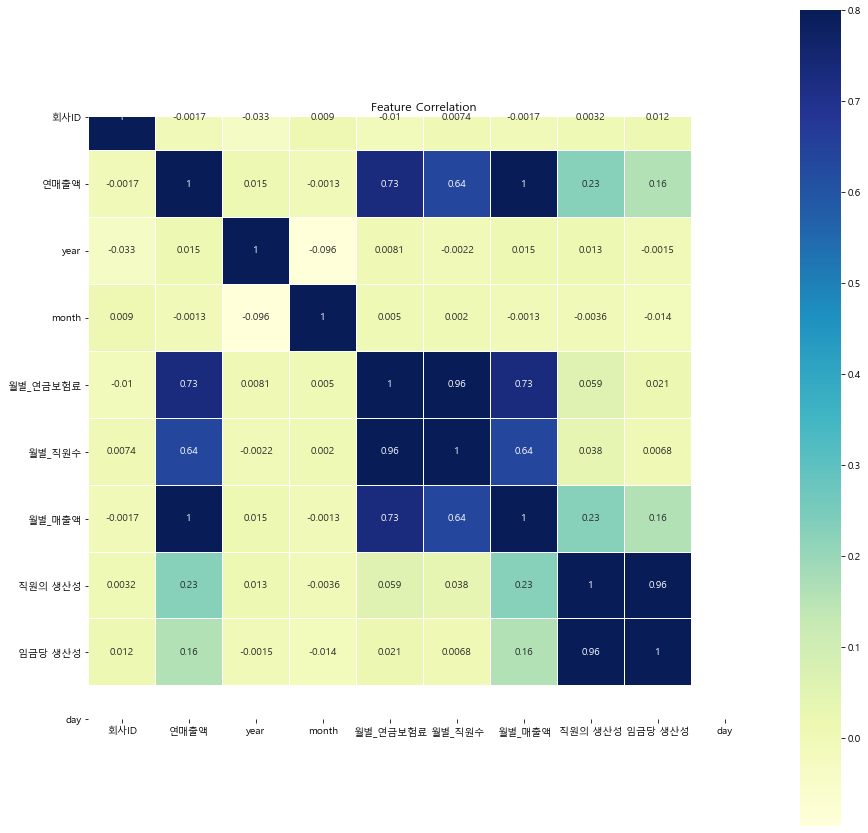

In [10]:
dcorr=df1.corr()
plt.figure(figsize=(15, 15));
sns.heatmap(dcorr,
            vmax=0.8,
            linewidths=0.01,
            square=True,
            annot=True,
            cmap='YlGnBu');
plt.title('Feature Correlation')

<U>직원수가 많고 보험료를 많이 낼수록 매출액이 증가하는 상관관계를 보인다.</U>
즉, 상관관계만 보더라도 이 세가지 변수가 모두 높은 그룹이  
유니콘기업일 것이라는 가설이 더 신빙성이 있다.  
<br></br>
그러나, 박스플롯으로 매출액, 직원의 생산성, 보험료 등은 한쪽에 데이터가 너무 몰려있어 박스플롯이 이상하게 나온다.

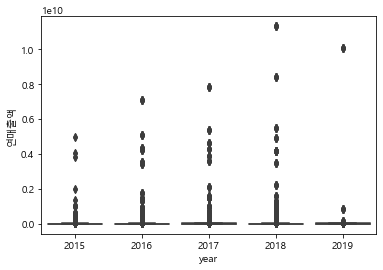

In [11]:
sns.boxplot(x='year',y='연매출액',data=df1)

- 그러므로 이를 살펴보기 위해 매출액에서 제일 많이 수치를 제외하고 히스트플롯을 생성한다.  
- 전체 범위로 히스토그램을 그리면 아래처럼 너무 몰려있는 데이터가 많아서 나머지 데이터의 빈도를 알기 힘들다.  
- 향후 매출액 증가율을 확인하는데, 매출액의 절대적인 수치 또한 기업의 성장을 위해 중요하다고 판단되 고려한다.  
- 매출액을 히스토그램에서 보는 것처럼 0.1e+10의 범위, 그이상부터 0.25e+10, 그이상부터 0.6e+10, 그이상부터 max까지로 카테고리화 한다.

(array([9.9431e+04, 1.2400e+02, 0.0000e+00, 1.2400e+02, 6.2000e+01,
        0.0000e+00, 2.4000e+01, 1.2000e+01, 1.2000e+01, 1.2000e+01]),
 array([-7.88217600e+06,  1.12578398e+09,  2.25945014e+09,  3.39311630e+09,
         4.52678245e+09,  5.66044861e+09,  6.79411477e+09,  7.92778092e+09,
         9.06144708e+09,  1.01951132e+10,  1.13287794e+10]),
 <a list of 10 Patch objects>)

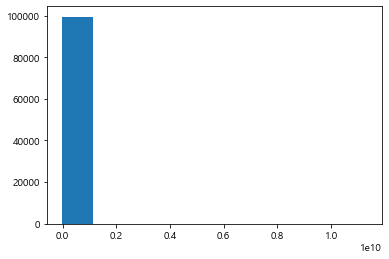

In [12]:
plt.hist(df1.연매출액)

- 매출액을 더 자세하게 보기 위하여 히스토그램 범위 지정

(array([140.,  24.,  64.,  98.,  24.,  12.,  12.,  12.,  12.,  12.]),
 array([1.00000000e+09, 2.03287795e+09, 3.06575590e+09, 4.09863385e+09,
        5.13151180e+09, 6.16438975e+09, 7.19726770e+09, 8.23014565e+09,
        9.26302360e+09, 1.02959015e+10, 1.13287795e+10]),
 <a list of 10 Patch objects>)

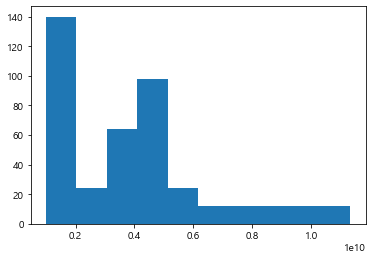

In [13]:
plt.hist(df1.연매출액,range=(0.1e+10,df1.연매출액.max()+100))

In [14]:
# 히스토그램 기반 매출액 크기 기준으로 점수 부여 (향후 매출액성장률과 혼용하여 평가지표로 사용)
l1=[]
for i in df1.연매출액:
    if i >= 0.6e+10:
        l1.append(2)
    elif i >= 0.2e+10:
        l1.append(1.5)
    elif i>= 0.1e+10:
        l1.append(1)
    else:
        l1.append(0.5)

        
df1['sal_grade']=l1

In [15]:
df1['sal_grade'].value_counts()

0.5    99391
1.5      212
1.0      138
2.0       60
Name: sal_grade, dtype: int64

In [16]:
df1.groupby(['회사ID','year'])['연매출액'].mean()

회사ID     year
63       2018    1.132878e+10
95       2018    6.569474e+08
102      2018    7.426589e+08
295      2018    8.377670e+07
414      2018    1.973277e+07
                     ...     
2400284  2018    1.263406e+06
2437574  2018    2.140160e+05
2693684  2019    2.380760e+05
3312354  2019    1.451563e+06
5159723  2019    2.591898e+06
Name: 연매출액, Length: 10111, dtype: float64

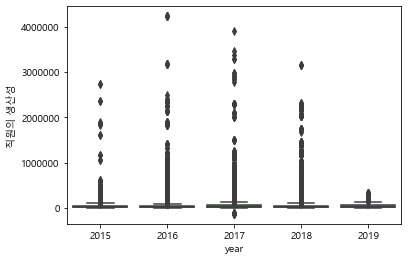

In [17]:
sns.boxplot(x='year',y='직원의 생산성',data=df1)

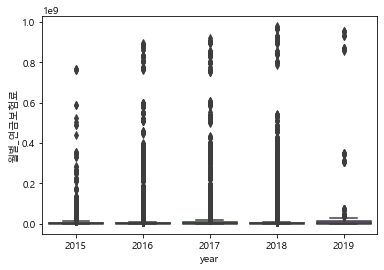

In [18]:
sns.boxplot(x='year',y='월별_연금보험료',data=df1)

- 실제 유니콘 회사들의 영업이력이 평균 5년정도 되므로, 최소 3년 이상의 기업만 필터링

In [19]:
y_count=df1.groupby('회사ID')['year'].count().loc[df1.groupby('회사ID')['year'].count()>=36].reset_index()

In [20]:
y_count.columns=['회사ID','y_count']

In [21]:
# 불필요한 행을 제외하기 위해 inner join 수행
df1=pd.merge(df1,y_count,on='회사ID')

- 밀도기반으로 이상값을 찾는 방법인 LocalOutlierFactor를 사용해 소수의 회사를 추출  
  (향후에 가설대로 추출한 유니콘 기업과 비교)

In [22]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(contamination=0.00125)
df1['outlier'] = lof.fit_predict(np.asmatrix(df1.drop(['year','month','date','day'],axis=1)))

In [23]:
len(df1.query("outlier==-1").회사ID.unique())

7

In [24]:
df1=df1.sort_values(by=['회사ID','year','month'])

***

### 2. 첫번째 가설인 '최소 3개년 이상 유지되는 회사의 연매출액 증가율이 높은 기업 추출'

In [25]:
# 3년 이상 운영한 회사의 연별 매출액의 성장률을 출력
tempt=df1.groupby(['회사ID','year'])['연매출액'].mean().reset_index()
tempt2=tempt.groupby('회사ID')['연매출액'].pct_change()
tempt=pd.concat([tempt,tempt2],axis=1)
tempt.columns=['회사ID','year','연매출액','연매출액gr']
tempt=tempt.dropna()
tempt2=tempt.groupby(['회사ID'])['연매출액gr'].mean().sort_values(ascending=False)
tempt2

회사ID
145177    18.405927
233340     5.327505
435512     5.101907
335237     5.035858
294620     4.760962
            ...    
144945    -0.425689
430507    -0.426755
331827    -0.472882
264218    -0.668611
432911    -2.164515
Name: 연매출액gr, Length: 1127, dtype: float64

(array([  0.,   0.,   0.,   4., 350., 622., 103.,  29.,   5.,   2.]),
 array([-2. , -1.6, -1.2, -0.8, -0.4,  0. ,  0.4,  0.8,  1.2,  1.6,  2. ]),
 <a list of 10 Patch objects>)

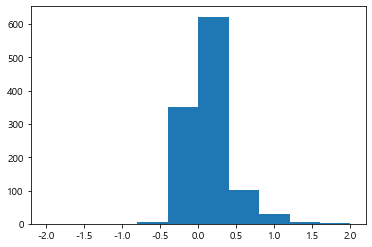

In [26]:
# 히스토그램을 통해 연매출액 증가율이 3단계로 구분할 수 있다는 것을  확인할 수 있음
plt.hist(tempt2,range=(-2,2))

In [27]:
l1=[]
for i in tempt2:
    if i >= 0.75:
        l1.append(3)
    elif i >= 0:
        l1.append(2)
    else:
        l1.append(1)

In [28]:
tempt2=tempt2.reset_index()
tempt2['cat_매출액gr']=l1
tempt2

,회사ID,연매출액gr,cat_매출액gr
0,145177,18.405927,3
1,233340,5.327505,3
2,435512,5.101907,3
3,335237,5.035858,3
4,294620,4.760962,3
...,...,...,...
1122,144945,-0.425689,1
1123,430507,-0.426755,1
1124,331827,-0.472882,1
1125,264218,-0.668611,1


- 원본 데이터에 추가한 매출액 규모기준 점수를 성장률 점수와 합하기 위하여 left join으로 추가한다.
- 그리고 점수별로 데이터의 개수를 파악하여 0.5점과 1점의 회사는 성장률과 매출액 모두 뛰어난 요소가 없기에 제외한다.

In [29]:
tempt2=pd.merge(tempt2,df1.loc[:,['회사ID','sal_grade']],on='회사ID',how='left')
df_fin=tempt2
df_fin

,회사ID,연매출액gr,cat_매출액gr,sal_grade
0,145177,18.405927,3,0.5
1,145177,18.405927,3,0.5
2,145177,18.405927,3,0.5
3,145177,18.405927,3,0.5
4,145177,18.405927,3,0.5
...,...,...,...,...
42465,432911,-2.164515,1,0.5
42466,432911,-2.164515,1,0.5
42467,432911,-2.164515,1,0.5
42468,432911,-2.164515,1,0.5


In [30]:
# 매출액 규모와 성장률을 모두 고려한 매출 기반 점수 설정
tempt2['sal_grade_fin']=tempt2.cat_매출액gr*tempt2.sal_grade
tempt2['sal_grade_fin'].value_counts()

1.0    26754
0.5    13238
1.5     2190
3.0      140
2.0      100
4.0       48
Name: sal_grade_fin, dtype: int64

- 매출성장률 기반 유니콘 후보기업 추출(점수기준 역성장하거나 정체되어 있는 그룹 제거)

***

### 3. 두번째 가설인 직원의 생산성이 높은 기업을 추출

In [31]:
# 직원 생산성은 월별로 측정가능한 변수이기 때문에 월별로 성장률을 구함
tempt=df1.groupby(['회사ID','year','month'])['직원의 생산성'].mean().reset_index()
tempt2=tempt.groupby(['회사ID','year'])['직원의 생산성'].pct_change()
tempt=pd.concat([tempt,tempt2],axis=1).dropna()
tempt.columns=['회사ID','year','month','직원의 생산성','직원생산성gr']
tempt=tempt.fillna(0.0)
tempt
tempt2=tempt.groupby(['회사ID'])['직원생산성gr'].mean().sort_values(ascending=False)
tempt2

회사ID
404071    0.120977
507086    0.108481
137889    0.104031
228565    0.083298
474900    0.083099
            ...   
405759   -0.044975
297402   -0.048071
129633   -0.049712
472892   -0.054916
137755   -0.064765
Name: 직원생산성gr, Length: 1127, dtype: float64

In [32]:
tempt.직원생산성gr.max()

4.25

In [33]:
tempt.직원생산성gr.min()

-0.7777777777777778

In [34]:
tempt.직원생산성gr.mean()

0.0020927303369879208

(array([2.2000e+02, 3.7435e+04, 5.3300e+02, 2.5000e+01, 8.0000e+00,
        1.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([-0.77777778, -0.275     ,  0.22777778,  0.73055556,  1.23333333,
         1.73611111,  2.23888889,  2.74166667,  3.24444444,  3.74722222,
         4.25      ]),
 <a list of 10 Patch objects>)

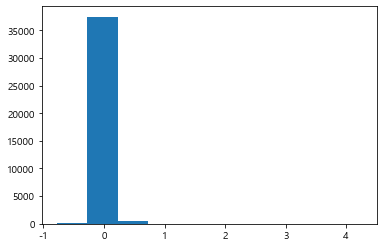

In [35]:
# 히스토 그램에 의해 직원생산성이 0을 중심으로 밀집되어 있으며 -값도 존재한다는 것을 확인
plt.hist(tempt.직원생산성gr)

(array([2.6475e+04, 1.6860e+03, 3.6100e+02, 1.8000e+02, 3.2000e+01,
        5.2000e+01, 1.2000e+01, 1.0000e+01, 5.0000e+00, 9.0000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

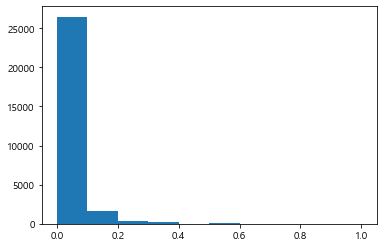

In [36]:
# 유니콘 기업을 찾기 위해 직원생산성이 높은 상위 그룹의 빈도 파악
plt.hist(tempt.직원생산성gr,range=(0,1))

- 직원생산성성장률도 히스토그램의 빈도를 기준으로 범주화하여 점수로 사용

In [37]:
l1=[]
for i in tempt2:
    if i >= 0.2:
        l1.append(3)
    elif i >= 0.002:
        l1.append(2)
    elif i >= 0.0:
        l1.append(1)
    else:
        l1.append(0.5)

In [38]:
tempt2=tempt2.reset_index()
tempt2['cat_직원생산성gr']=l1
tempt2

,회사ID,직원생산성gr,cat_직원생산성gr
0,404071,0.120977,2.0
1,507086,0.108481,2.0
2,137889,0.104031,2.0
3,228565,0.083298,2.0
4,474900,0.083099,2.0
...,...,...,...
1122,405759,-0.044975,0.5
1123,297402,-0.048071,0.5
1124,129633,-0.049712,0.5
1125,472892,-0.054916,0.5


In [39]:
df_fin=pd.merge(df_fin,tempt2.loc[:,['회사ID','cat_직원생산성gr']],on='회사ID',how='left')
df_fin

,회사ID,연매출액gr,cat_매출액gr,sal_grade,sal_grade_fin,cat_직원생산성gr
0,145177,18.405927,3,0.5,1.5,2.0
1,145177,18.405927,3,0.5,1.5,2.0
2,145177,18.405927,3,0.5,1.5,2.0
3,145177,18.405927,3,0.5,1.5,2.0
4,145177,18.405927,3,0.5,1.5,2.0
...,...,...,...,...,...,...
42465,432911,-2.164515,1,0.5,0.5,2.0
42466,432911,-2.164515,1,0.5,0.5,2.0
42467,432911,-2.164515,1,0.5,0.5,2.0
42468,432911,-2.164515,1,0.5,0.5,2.0


- 직원 생산성 기반 유니콘 기업 후보 추출

***

### 4. 마직막 가설인 임금당 생산성 증가율(양질의 인력의 지속적인 확보)로 유니콘 기업 후보 추출

In [40]:
# 임금당 생산성은 월별로 측정가능한 변수이기 때문에 월별로 성장률을 구함
tempt=df1.groupby(['회사ID','year','month'])['임금당 생산성'].mean().reset_index()
tempt2=tempt.groupby(['회사ID','year'])['임금당 생산성'].pct_change()
tempt=pd.concat([tempt,tempt2],axis=1)
tempt.columns=['회사ID','year','month','임금당 생산성','임금당생산성gr']
tempt=tempt.fillna(0.0)
tempt
tempt2=tempt.groupby(['회사ID'])['임금당생산성gr'].mean().sort_values(ascending=False)
tempt2

회사ID
474900    0.115805
404071    0.097946
507086    0.082750
235976    0.073583
137889    0.071053
            ...   
297402   -0.044731
306768   -0.046338
129633   -0.053895
472892   -0.059353
137755   -0.063877
Name: 임금당생산성gr, Length: 1127, dtype: float64

In [41]:
tempt.임금당생산성gr.max()

3.537147969503657

In [42]:
tempt.임금당생산성gr.min()

-0.7927944225657867

In [43]:
tempt.임금당생산성gr.mean()

-0.0016574264424023006

- 히스토그램을 통한 임금당생산성 증가율의 임곗값 설정

(array([1.1300e+02, 3.9424e+04, 2.8450e+03, 6.0000e+01, 1.4000e+01,
        6.0000e+00, 3.0000e+00, 3.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([-0.79279442, -0.35980018,  0.07319406,  0.5061883 ,  0.93918253,
         1.37217677,  1.80517101,  2.23816525,  2.67115949,  3.10415373,
         3.53714797]),
 <a list of 10 Patch objects>)

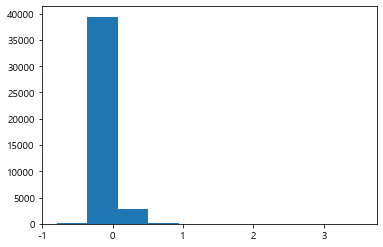

In [44]:
plt.hist(tempt.임금당생산성gr)

(array([   65.,   203.,   646.,  2964., 31932.,  5020.,  1035.,   269.,
          129.,    63.]),
 array([-0.45 , -0.355, -0.26 , -0.165, -0.07 ,  0.025,  0.12 ,  0.215,
         0.31 ,  0.405,  0.5  ]),
 <a list of 10 Patch objects>)

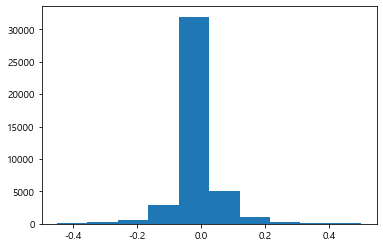

In [45]:
plt.hist(tempt.임금당생산성gr,range=(-0.45,0.5))

(array([1.0471e+04, 1.6400e+02, 2.0000e+01, 1.3000e+01, 4.0000e+00,
        3.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([1.0000e-03, 3.6090e-01, 7.2080e-01, 1.0807e+00, 1.4406e+00,
        1.8005e+00, 2.1604e+00, 2.5203e+00, 2.8802e+00, 3.2401e+00,
        3.6000e+00]),
 <a list of 10 Patch objects>)

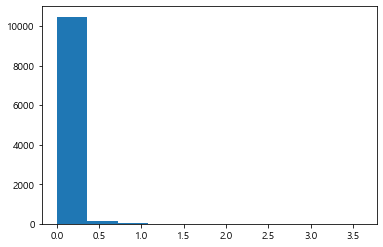

In [46]:
plt.hist(tempt.임금당생산성gr,range=(0.001,3.6))

In [47]:
l1=[]
for i in tempt2:
    if i >= 0.001:
        l1.append(2)
    elif i >= 0.0:
        l1.append(1)
    else:
        l1.append(0.5)

In [48]:
tempt2=tempt2.reset_index()
tempt2['cat_임금당생산성gr']=l1
tempt2

,회사ID,임금당생산성gr,cat_임금당생산성gr
0,474900,0.115805,2.0
1,404071,0.097946,2.0
2,507086,0.082750,2.0
3,235976,0.073583,2.0
4,137889,0.071053,2.0
...,...,...,...
1122,297402,-0.044731,0.5
1123,306768,-0.046338,0.5
1124,129633,-0.053895,0.5
1125,472892,-0.059353,0.5


In [49]:
df_fin=pd.merge(df_fin,tempt2.loc[:,['회사ID','cat_임금당생산성gr']],on='회사ID',how='left')
df_fin

,회사ID,연매출액gr,cat_매출액gr,sal_grade,sal_grade_fin,cat_직원생산성gr,cat_임금당생산성gr
0,145177,18.405927,3,0.5,1.5,2.0,2.0
1,145177,18.405927,3,0.5,1.5,2.0,2.0
2,145177,18.405927,3,0.5,1.5,2.0,2.0
3,145177,18.405927,3,0.5,1.5,2.0,2.0
4,145177,18.405927,3,0.5,1.5,2.0,2.0
...,...,...,...,...,...,...,...
42465,432911,-2.164515,1,0.5,0.5,2.0,0.5
42466,432911,-2.164515,1,0.5,0.5,2.0,0.5
42467,432911,-2.164515,1,0.5,0.5,2.0,0.5
42468,432911,-2.164515,1,0.5,0.5,2.0,0.5


In [50]:
# 최고점인 5.5점 기준으로 유니콘 기업을 선정
df_fin['t_score']=df_fin.sal_grade_fin+df_fin.cat_직원생산성gr+df_fin.cat_임금당생산성gr
df_tscore=df_fin.groupby('회사ID')['t_score'].mean().sort_values(ascending=False)
df_tscore.value_counts()

2.000000    405
5.000000    174
4.500000    167
2.500000    104
3.500000     88
1.500000     86
3.000000     48
4.000000     35
5.500000     17
3.684211      1
2.684211      1
2.631579      1
Name: t_score, dtype: int64

In [51]:
top17=df_tscore.loc[df_tscore==5.5]

In [52]:
df1.query("회사ID in @top17.index")['연매출액'].mean()

618107257.2404871

In [53]:
df1['연매출액'].mean()

60267211.258817986

In [54]:
df1.query("회사ID in @top17.index")['직원의 생산성'].mean()

81556.46223103792

In [55]:
df1['직원의 생산성'].mean()

60973.36676495885

In [56]:
df1.query("회사ID in @top17.index")['임금당 생산성'].mean()

3.5488736397576606

In [57]:
df1['임금당 생산성'].mean()

2.7193729534060704

***

### 5. 최종 유니콘 기업을 선정

- 최종적으로 유니콘 기업 목록은 다음과 같다.
- 다만, 아쉬운점은 localoutlierfactor를 기반으로 추출한 이상값이 유니콘기업일 것이라는 가정은 분석결과 틀렸다.

In [58]:
top17.index.values

array([264568, 254718, 435512, 474900, 445499, 140801, 431317, 280967,
       180401, 259149, 145177, 331110, 419945, 470994, 248177, 441735,
       195233], dtype=int64)

In [59]:
df1.query("회사ID in @top17.index").outlier.unique()

array([1])